# Documentation

This Jupyter notebook contains a deep learning model for predicting house prices based on images of different rooms in the house. The model is built using TensorFlow and Keras. The code is divided into several sections, each containing a specific task.

## Section 1: Importing Libraries and Setting Environment Variables

The first section of the code imports the necessary libraries and sets the environment variable `TF_CPP_MIN_LOG_LEVEL` to 3 to suppress TensorFlow warnings.

## Section 2: Defining the HouseNet Class

The `HouseNet` class is defined in this section. It contains a static method `build()` that builds a convolutional neural network (CNN) model for predicting house prices. The model takes four inputs: images of the bathroom, bedroom, frontal, and kitchen. Each input is processed through a series of convolutional and max pooling layers. The outputs of these layers are then concatenated and flattened. Finally, the flattened output is passed through two dense layers to produce the final prediction.

## Section 3: Loading and Preprocessing Data

In this section, the code loads the data from a CSV file and preprocesses the images. The images are resized to 32x32 pixels, converted to RGB format, and normalized by dividing by 255. The labels are also normalized by dividing by the maximum label value. The data is then split into training and testing sets using the `train_test_split` function from scikit-learn.

## Section 4: Training the Model

The model is trained in this section using the training data. The model is compiled with the Adam optimizer and mean squared error (MSE) loss function. The model is then fitted to the training data for 40 epochs. The training and validation loss are plotted to visualize the training process.

## Section 5: Leaky ReLU Activation Function

In this section, the code defines a custom activation function called Leaky ReLU. Leaky ReLU is a variant of the ReLU activation function that allows a small gradient for negative input values to prevent the vanishing gradient problem.

## Section 6: Defining the HouseNet\_Leaky\_Relu Class

The `HouseNet_Leaky_Relu` class is defined in this section. It is similar to the `HouseNet` class, but it uses the Leaky ReLU activation function instead of the standard ReLU activation function.

## Section 7: Training the Model with Leaky ReLU Activation Function

The model with Leaky ReLU activation function is trained in this section using the same training and testing data as before. The training and validation loss are plotted to visualize the training process.

## Section 8: Swish Activation Function

In this section, the code defines a custom activation function called Swish. Swish is a smooth, non-monotonic activation function that can improve the performance of neural networks.

## Section 9: Defining the HouseNet\_Leaky\_Swish Class

The `HouseNet_Leaky_Swish` class is defined in this section. It is similar to the `HouseNet` class, but it uses the Swish activation function instead of the standard ReLU activation function.

## Section 10: Training the Model with Swish Activation Function

The model with Swish activation function is trained in this section using the same training and testing data as before. The training and validation loss are plotted to visualize the training process.

## Conclusion

This notebook demonstrates the use of different activation functions (ReLU, Leaky ReLU, and Swish) in a convolutional neural network for predicting house prices based on images of different rooms in the house. The use of different activation functions can have a significant impact on the performance of the model. The notebook also sho

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [32]:


class HouseNet():
    
    @staticmethod
    def build():
        bathroom_input = layers.Input((32, 32, 3))

        x = layers.Conv2D(16, (3, 3), padding="same",activation="relu")(bathroom_input)
        x = layers.MaxPool2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x)
        x = layers.MaxPool2D((2, 2))(x)

        bedroom_input = layers.Input((32, 32, 3))
        y = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(bedroom_input)
        y = layers.MaxPool2D((2, 2))(y)
        y = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(y)
        y = layers.MaxPool2D((2, 2))(y)

        frontal_input = layers.Input((32, 32, 3))
        z = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(frontal_input)
        z = layers.MaxPool2D((2, 2))(z)
        z = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(z)
        z = layers.MaxPool2D((2, 2))(z)

        kitchen_input = layers.Input((32, 32, 3))
        w = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(kitchen_input)
        w = layers.MaxPool2D((2, 2))(w)
        w = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(w)
        w = layers.MaxPool2D((2, 2))(w)
        

        concat_inputs = layers.concatenate([x, y, z, w], axis = 2)
        flat_layer = layers.Flatten()(concat_inputs)
        out = layers.Dense(100, activation="relu")(flat_layer)
        out = layers.Dense(1, activation="linear")(out)

        net = models.Model(
            inputs=[bathroom_input, bedroom_input, frontal_input, kitchen_input], outputs=out)

        return net


Resut using normal Relu

In [33]:
import cv2
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

bathroom_list = []
bedroom_list = []
frontal_list = []
kitchen_list = []
label_list = []

df = pd.read_csv("HousesInfo.txt", sep = " ",
                    names=["col_1", "col_2", "col_3", "col_4", "price"])

labels = np.array(df.loc[:, "price"])

labels = labels/np.max(labels)
print(labels)

def preprocess(img):

        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255.0

        return img

for i, item in enumerate(glob.glob("house_dataset\\*.jpg")):
        
    image = cv2.imread(item)
    image = preprocess(image)
    location = item.split("\\")[-1].split("_")[-1].split(".")[0]
    #print(location)

    if   location == "bathroom": bathroom_list.append(image)
    elif location == "bedroom": bedroom_list.append(image)
    elif location == "frontal": frontal_list.append(image)
    elif location == "kitchen": kitchen_list.append(image)

    if i % 100 == 0:
        print("[INFO]: {}/2500 processed".format(i))

bathroom_list = np.array(bathroom_list)
bedroom_list = np.array(bedroom_list)
frontal_list = np.array(frontal_list)
kitchen_list = np.array(kitchen_list)

split = train_test_split(bathroom_list, bedroom_list,
                         frontal_list, kitchen_list,labels,  test_size=0.2)

(bathroom_train, bathroom_test, bedroom_train, bedroom_test, 
 frontal_train, frontal_test, kitchen_train, kitchen_test, labels_train, labels_test) = split


net = HouseNet.build()

[0.1484295  0.14769546 0.15175828 0.15534312 0.16579481 0.2132127
 0.13639467 0.28986002 0.29856606 0.25606009 0.08863093 0.17736429
 0.13639467 0.15175828 0.11949471 0.08535336 0.12632298 0.12376238
 0.20467736 0.15790372 0.29856606 0.27227723 0.13654831 0.23472175
 0.22960055 0.22021168 0.16430522 0.14936839 0.2816661  0.20467736
 0.13468761 0.17736429 0.06230795 0.2893479  0.17053602 0.2208945
 0.18589962 0.13654831 0.20979857 0.07767156 0.06742916 0.10907136
 0.07425743 0.09026972 0.05974735 0.07255036 0.08535336 0.1006999
 0.07152612 0.07084329 0.03668488 0.11947764 0.07664732 0.04265961
 0.10174104 0.0913281  0.07509389 0.07681803 0.03345852 0.01790714
 0.03583134 0.0887675  0.04265961 0.0203141  0.03721407 0.04351314
 0.03747013 0.0318368  0.01613179 0.05802322 0.04421304 0.03345852
 0.0247354  0.05973028 0.03909184 0.03156367 0.03840901 0.04948788
 0.05104131 0.03839194 0.10225333 0.09044042 0.06785592 0.11949454
 0.11761693 0.09030386 0.24411062 0.14083305 0.10566746 0.1066917

In [34]:
net = HouseNet.build()

net.compile(optimizer="adam",
            loss = "MSE")

H = net.fit(x = [bathroom_train, bedroom_train, frontal_train, kitchen_train],
            y = labels_train,
            validation_data = ( [bathroom_test, bedroom_test, frontal_test, kitchen_test], labels_test),
              epochs=40,
              verbose = 1)

Epoch 1/40
14/14 [==============================] - 1s 50ms/step - loss: 2.9304 - val_loss: 0.0208
Epoch 2/40
14/14 [==============================] - 1s 42ms/step - loss: 0.0116 - val_loss: 0.0046
Epoch 3/40
14/14 [==============================] - 1s 40ms/step - loss: 0.0083 - val_loss: 0.0042
Epoch 4/40
14/14 [==============================] - 1s 41ms/step - loss: 0.0085 - val_loss: 0.0041
Epoch 5/40
14/14 [==============================] - 1s 41ms/step - loss: 0.0073 - val_loss: 0.0042
Epoch 6/40
14/14 [==============================] - 1s 41ms/step - loss: 0.0073 - val_loss: 0.0057
Epoch 7/40
14/14 [==============================] - 1s 40ms/step - loss: 0.0065 - val_loss: 0.0046
Epoch 8/40
14/14 [==============================] - 1s 41ms/step - loss: 0.0064 - val_loss: 0.0041
Epoch 9/40
14/14 [==============================] - 1s 41ms/step - loss: 0.0062 - val_loss: 0.0054
Epoch 10/40
14/14 [==============================] - 1s 41ms/step - loss: 0.0057 - val_loss: 0.0043
Epoch 11/

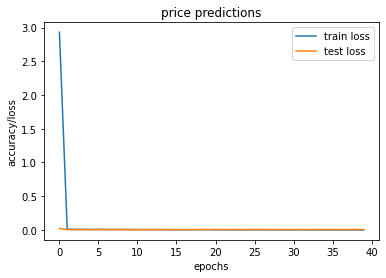

In [35]:

plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("price predictions")
plt.show() 

In [39]:
def Leaky_Relu(x):
    is_small= x<0
    return tf.where(is_small,0.01*x,x)            

In [45]:
class HouseNet_Leaky_Relu():
    
    @staticmethod
    def build():
        bathroom_input = layers.Input((32, 32, 3))

        x = layers.Conv2D(16, (3, 3), padding="same")(bathroom_input)
        x=  layers.Lambda(Leaky_Relu)(x)
        x = layers.MaxPool2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), padding="same")(x)
        x=  layers.Lambda(Leaky_Relu)(x)
        x = layers.MaxPool2D((2, 2))(x)

        bedroom_input = layers.Input((32, 32, 3))
        y = layers.Conv2D(16, (3, 3), padding="same")(bedroom_input)
        y=  layers.Lambda(Leaky_Relu)(y)
        y = layers.MaxPool2D((2, 2))(y)
        y = layers.Conv2D(32, (3, 3), padding="same")(y)
        y=  layers.Lambda(Leaky_Relu)(y)
        y = layers.MaxPool2D((2, 2))(y)

        frontal_input = layers.Input((32, 32, 3))
        z = layers.Conv2D(16, (3, 3), padding="same")(frontal_input)
        z=  layers.Lambda(Leaky_Relu)(z)
        z = layers.MaxPool2D((2, 2))(z)
        z = layers.Conv2D(32, (3, 3), padding="same")(z)
        z=  layers.Lambda(Leaky_Relu)(z)
        z = layers.MaxPool2D((2, 2))(z)

        kitchen_input = layers.Input((32, 32, 3))
        w = layers.Conv2D(16, (3, 3), padding="same")(kitchen_input)
        w=  layers.Lambda(Leaky_Relu)(w)
        w = layers.MaxPool2D((2, 2))(w)
        w = layers.Conv2D(32, (3, 3), padding="same")(w)
        w=  layers.Lambda(Leaky_Relu)(w)
        w = layers.MaxPool2D((2, 2))(w)
        

        concat_inputs = layers.concatenate([x, y, z, w], axis = 2)
        flat_layer = layers.Flatten()(concat_inputs)
        out = layers.Dense(100)(flat_layer)
        out= w=  layers.Lambda(Leaky_Relu)(out)
        out = layers.Dense(1, activation="linear")(out)

        net = models.Model(
            inputs=[bathroom_input, bedroom_input, frontal_input, kitchen_input], outputs=out)

        return net


In [51]:
net = HouseNet_Leaky_Relu.build()

net.compile(optimizer="adam",
            loss = "MSE")

H = net.fit(x = [bathroom_train, bedroom_train, frontal_train, kitchen_train],
            y = labels_train,
            validation_data = ( [bathroom_test, bedroom_test, frontal_test, kitchen_test], labels_test),
              epochs=40,
              verbose = 1)


Epoch 1/40
14/14 [==============================] - 2s 73ms/step - loss: 2.0230 - val_loss: 0.1342
Epoch 2/40
14/14 [==============================] - 1s 66ms/step - loss: 0.0380 - val_loss: 0.0051
Epoch 3/40
14/14 [==============================] - 1s 65ms/step - loss: 0.0100 - val_loss: 0.0043
Epoch 4/40
14/14 [==============================] - 1s 65ms/step - loss: 0.0085 - val_loss: 0.0039
Epoch 5/40
14/14 [==============================] - 1s 61ms/step - loss: 0.0083 - val_loss: 0.0042
Epoch 6/40
14/14 [==============================] - 1s 62ms/step - loss: 0.0083 - val_loss: 0.0039
Epoch 7/40
14/14 [==============================] - 1s 62ms/step - loss: 0.0083 - val_loss: 0.0040
Epoch 8/40
14/14 [==============================] - 1s 63ms/step - loss: 0.0083 - val_loss: 0.0039
Epoch 9/40
14/14 [==============================] - 1s 64ms/step - loss: 0.0083 - val_loss: 0.0040
Epoch 10/40
14/14 [==============================] - 1s 72ms/step - loss: 0.0083 - val_loss: 0.0040
Epoch 11/

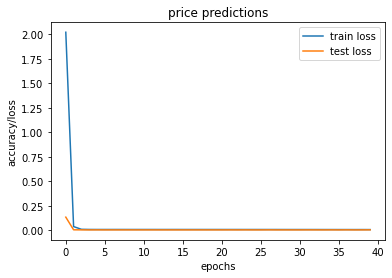

In [52]:
plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("price predictions")
plt.show() 

Swish activation

In [48]:
def Swish(x):
    out=x*tf.math.sigmoid(x)
    return out
print(Swish(0.5))

tf.Tensor(0.31122965, shape=(), dtype=float32)


In [55]:
class HouseNet_Leaky_Swish():
    
    @staticmethod
    def build():
        bathroom_input = layers.Input((32, 32, 3))

        x = layers.Conv2D(16, (3, 3), padding="same")(bathroom_input)
        x=  layers.Lambda(Swish)(x)
        x = layers.MaxPool2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), padding="same")(x)
        x=  layers.Lambda(Leaky_Relu)(x)
        x = layers.MaxPool2D((2, 2))(x)

        bedroom_input = layers.Input((32, 32, 3))
        y = layers.Conv2D(16, (3, 3), padding="same")(bedroom_input)
        y=  layers.Lambda(Swish)(y)
        y = layers.MaxPool2D((2, 2))(y)
        y = layers.Conv2D(32, (3, 3), padding="same")(y)
        y=  layers.Lambda(Swish)(y)
        y = layers.MaxPool2D((2, 2))(y)

        frontal_input = layers.Input((32, 32, 3))
        z = layers.Conv2D(16, (3, 3), padding="same")(frontal_input)
        z=  layers.Lambda(Swish)(z)
        z = layers.MaxPool2D((2, 2))(z)
        z = layers.Conv2D(32, (3, 3), padding="same")(z)
        z=  layers.Lambda(Swish)(z)
        z = layers.MaxPool2D((2, 2))(z)

        kitchen_input = layers.Input((32, 32, 3))
        w = layers.Conv2D(16, (3, 3), padding="same")(kitchen_input)
        w=  layers.Lambda(Swish)(w)
        w = layers.MaxPool2D((2, 2))(w)
        w = layers.Conv2D(32, (3, 3), padding="same")(w)
        w=  layers.Lambda(Swish)(w)
        w = layers.MaxPool2D((2, 2))(w)
        

        concat_inputs = layers.concatenate([x, y, z, w], axis = 2)
        flat_layer = layers.Flatten()(concat_inputs)
        out = layers.Dense(100)(flat_layer)
        out= w=  layers.Lambda(Swish)(out)
        out = layers.Dense(1, activation="linear")(out)

        net = models.Model(
            inputs=[bathroom_input, bedroom_input, frontal_input, kitchen_input], outputs=out)

        return net


In [56]:
net = HouseNet_Leaky_Swish.build()

net.compile(optimizer="adam",
            loss = "MSE")

H = net.fit(x = [bathroom_train, bedroom_train, frontal_train, kitchen_train],
            y = labels_train,
            validation_data = ( [bathroom_test, bedroom_test, frontal_test, kitchen_test], labels_test),
              epochs=40,
              verbose = 1)

Epoch 1/40
14/14 [==============================] - 2s 82ms/step - loss: 0.8496 - val_loss: 0.0076
Epoch 2/40
14/14 [==============================] - 1s 57ms/step - loss: 0.0543 - val_loss: 0.0255
Epoch 3/40
14/14 [==============================] - 1s 63ms/step - loss: 0.0199 - val_loss: 0.0119
Epoch 4/40
14/14 [==============================] - 1s 61ms/step - loss: 0.0106 - val_loss: 0.0053
Epoch 5/40
14/14 [==============================] - 1s 55ms/step - loss: 0.0083 - val_loss: 0.0049
Epoch 6/40
14/14 [==============================] - 1s 54ms/step - loss: 0.0081 - val_loss: 0.0042
Epoch 7/40
14/14 [==============================] - 1s 56ms/step - loss: 0.0074 - val_loss: 0.0042
Epoch 8/40
14/14 [==============================] - 1s 53ms/step - loss: 0.0071 - val_loss: 0.0041
Epoch 9/40
14/14 [==============================] - 1s 56ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 10/40
14/14 [==============================] - 1s 57ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 11/

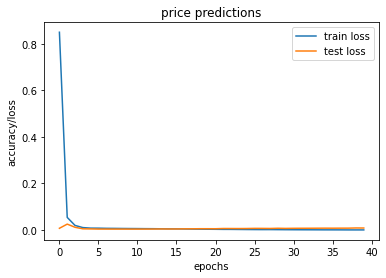

In [57]:
plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("price predictions")
plt.show() 